# Preprocessing phase.

In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
import requests
import matplotlib.pyplot as plt
import seaborn as sns
df = pd.read_csv('titanic-passengers.csv',encoding="ISO-8859-1",sep=";")
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,343,No,2,"Collander, Mr. Erik Gustaf",male,28.0,0,0,248740,13.0000,NaN,S
1,76,No,3,"Moen, Mr. Sigurd Hansen",male,25.0,0,0,348123,7.6500,F G73,S
2,641,No,3,"Jensen, Mr. Hans Peder",male,20.0,0,0,350050,7.8542,NaN,S
3,568,No,3,"Palsson, Mrs. Nils (Alma Cornelia Berglund)",female,29.0,0,4,349909,21.0750,NaN,S
4,672,No,1,"Davidson, Mr. Thornton",male,31.0,1,0,F.C. 12750,52.0000,B71,S


In [2]:
##Data description:  
# Survival - Survival (0 = No; 1 = Yes). Not included in test.csv file.
# Pclass - Passenger Class (1 = 1st; 2 = 2nd; 3 = 3rd)
# Name - Name
# Sex - Sex
# Age - Age
# Sibsp - Number of Siblings/Spouses Aboard
# Parch - Number of Parents/Children Aboard
# Ticket - Ticket Number
# Fare - Passenger Fare
# Cabin - Cabin
# Embarked - Port of Embarkation (C = Cherbourg; Q = Queenstown; S = Southampton)

In [3]:
#Cleaning the data from outliers
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [4]:
df = df.drop(columns="Cabin")
df.dropna(inplace=True)
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,343,No,2,"Collander, Mr. Erik Gustaf",male,28.0,0,0,248740,13.0000,S
1,76,No,3,"Moen, Mr. Sigurd Hansen",male,25.0,0,0,348123,7.6500,S
2,641,No,3,"Jensen, Mr. Hans Peder",male,20.0,0,0,350050,7.8542,S
3,568,No,3,"Palsson, Mrs. Nils (Alma Cornelia Berglund)",female,29.0,0,4,349909,21.0750,S
4,672,No,1,"Davidson, Mr. Thornton",male,31.0,1,0,F.C. 12750,52.0000,S


In [5]:
df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

In [6]:
df["Survived"].unique()

array(['No', 'Yes'], dtype=object)

In [7]:
df['Family'] = df.Parch + df.SibSp
df['Family'].loc[df['Family']>0] = 'Yes'
df['Family'].loc[df['Family'] == 0] = 'No'

C:\Users\21265\anaconda3\lib\site-packages\pandas\core\indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


In [8]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Family
0,343,No,2,"Collander, Mr. Erik Gustaf",male,28.0,0,0,248740,13.0000,S,No
1,76,No,3,"Moen, Mr. Sigurd Hansen",male,25.0,0,0,348123,7.6500,S,No
2,641,No,3,"Jensen, Mr. Hans Peder",male,20.0,0,0,350050,7.8542,S,No
3,568,No,3,"Palsson, Mrs. Nils (Alma Cornelia Berglund)",female,29.0,0,4,349909,21.0750,S,Yes
4,672,No,1,"Davidson, Mr. Thornton",male,31.0,1,0,F.C. 12750,52.0000,S,Yes


In [9]:
cleanup_nums = {"Family":     {"No": 0, "Yes": 1}}

In [10]:
df = df.replace(cleanup_nums)
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Family
0,343,No,2,"Collander, Mr. Erik Gustaf",male,28.0,0,0,248740,13.0000,S,0
1,76,No,3,"Moen, Mr. Sigurd Hansen",male,25.0,0,0,348123,7.6500,S,0
2,641,No,3,"Jensen, Mr. Hans Peder",male,20.0,0,0,350050,7.8542,S,0
3,568,No,3,"Palsson, Mrs. Nils (Alma Cornelia Berglund)",female,29.0,0,4,349909,21.0750,S,1
4,672,No,1,"Davidson, Mr. Thornton",male,31.0,1,0,F.C. 12750,52.0000,S,1


In [11]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
df['sex_num']=encoder.fit_transform(df["Sex"])

In [12]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Family,sex_num
0,343,No,2,"Collander, Mr. Erik Gustaf",male,28.0,0,0,248740,13.0000,S,0,1
1,76,No,3,"Moen, Mr. Sigurd Hansen",male,25.0,0,0,348123,7.6500,S,0,1
2,641,No,3,"Jensen, Mr. Hans Peder",male,20.0,0,0,350050,7.8542,S,0,1
3,568,No,3,"Palsson, Mrs. Nils (Alma Cornelia Berglund)",female,29.0,0,4,349909,21.0750,S,1,0
4,672,No,1,"Davidson, Mr. Thornton",male,31.0,1,0,F.C. 12750,52.0000,S,1,1


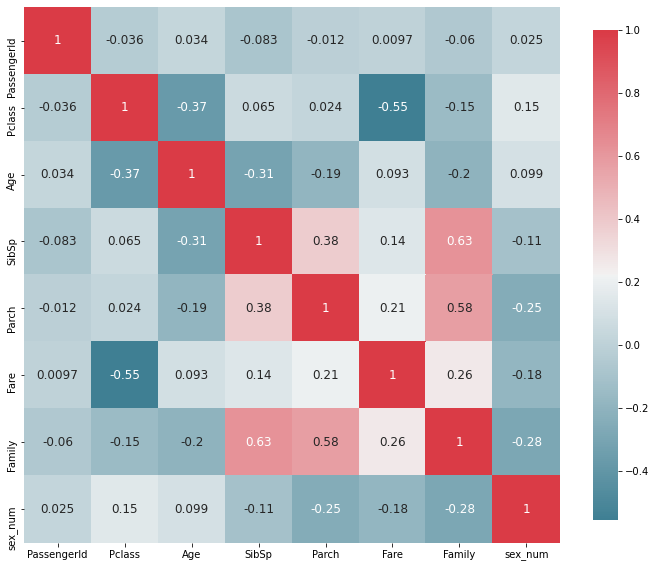

In [13]:
#Stydy of the fucntion
def plot_correlation_map(df):
    corr = df.corr()
    s,ax = plt.subplots(figsize =(12,10))
    cmap = sns.diverging_palette(220,10,as_cmap=True)
    s = sns.heatmap(corr,cmap = cmap,square=True,cbar_kws={'shrink':.9},ax=ax,annot = True,annot_kws = {'fontsize':12})

#It didn't work -?-
plot_correlation_map(df)

In [14]:
#Use the groupby function combined with the mean() to view the relation between Pclass and survived 

In [15]:
df.groupby(['Pclass', 'Survived']).mean()

PassengerId        Age     SibSp     Parch       Fare  \
Pclass Survived                                                          
1      No         395.500000  43.695312  0.359375  0.375000  67.356313   
       Yes        500.775000  35.124333  0.508333  0.433333  99.083752   
2      No         451.388889  33.544444  0.344444  0.155556  20.754953   
       Yes        442.566265  25.901566  0.518072  0.674699  22.248595   
3      No         450.362963  26.555556  0.625926  0.433333  13.180014   
       Yes        412.176471  20.646118  0.458824  0.529412  13.386421   

                   Family   sex_num  
Pclass Survived                      
1      No        0.453125  0.953125  
       Yes       0.591667  0.333333  
2      No        0.322222  0.933333  
       Yes       0.614458  0.180723  
3      No        0.340741  0.796296  
       Yes       0.447059  0.447059

In [16]:
df.groupby('Survived')['Pclass'].mean()

Survived
No     2.485849
Yes    1.878472
Name: Pclass, dtype: float64

In [17]:
print(df.dtypes)

PassengerId      int64
Survived        object
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Embarked        object
Family           int64
sex_num          int32
dtype: object


In [18]:
df['Age'] = df['Age'].astype(np.int64)
print(df.dtypes)

PassengerId      int64
Survived        object
Pclass           int64
Name            object
Sex             object
Age              int64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Embarked        object
Family           int64
sex_num          int32
dtype: object


C:\Users\21265\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


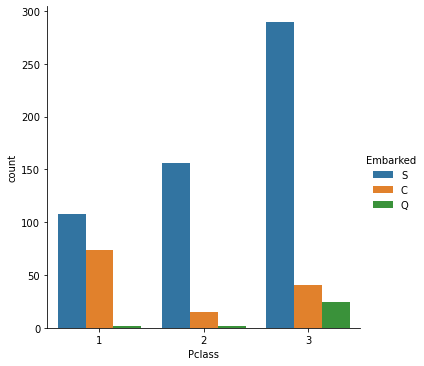

In [19]:
sns.catplot('Pclass',data=df,kind='count',hue='Embarked')

C:\Users\21265\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


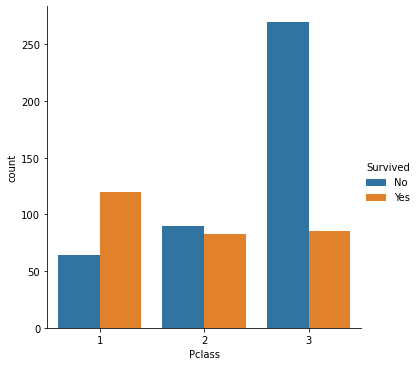

In [20]:
sns.catplot('Pclass',data=df,kind='count',hue='Survived')

In [21]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Family,sex_num
0,343,No,2,"Collander, Mr. Erik Gustaf",male,28,0,0,248740,13.0000,S,0,1
1,76,No,3,"Moen, Mr. Sigurd Hansen",male,25,0,0,348123,7.6500,S,0,1
2,641,No,3,"Jensen, Mr. Hans Peder",male,20,0,0,350050,7.8542,S,0,1
3,568,No,3,"Palsson, Mrs. Nils (Alma Cornelia Berglund)",female,29,0,4,349909,21.0750,S,1,0
4,672,No,1,"Davidson, Mr. Thornton",male,31,1,0,F.C. 12750,52.0000,S,1,1


In [22]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

In [23]:
x = df[['Age', 'Pclass','sex_num']]
y = df['Survived']

In [24]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.25,random_state=0)  

In [25]:
logreg = LogisticRegression()
logreg.fit(x_train, y_train)
y_pred  = logreg.predict(x_test)
print("Accuracy={:.2f}".format(logreg.score(x_test, y_test)))

Accuracy=0.84


In [26]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_pred, y_test)

array([[91, 19],
       [10, 58]], dtype=int64)

<AxesSubplot:xlabel='Predicted', ylabel='Actual'>

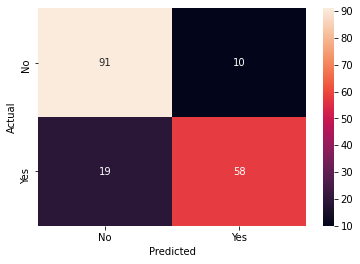

In [27]:
confusion_matrix = pd.crosstab(y_test, y_pred, rownames=['Actual'], colnames=['Predicted'])
sns.heatmap(confusion_matrix, annot=True)

UNDERSTANDING AUC/ROC :
-
AUC : Area Under the Curve
ROC : Receiver Operating Characteristics

the AUC-ROC curve helps us visualize how well our machine learning classifier is performing, and it only works for binary classification problems.

In [28]:
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split

# generate two class dataset
X, y = make_classification(n_samples=1000, n_classes=2, n_features=20, random_state=27)

# split into train-test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=27)

In [29]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier

# logistic regression
model1 = LogisticRegression()
# knn
model2 = KNeighborsClassifier(n_neighbors=4)

# fit model
model1.fit(X_train, y_train)
model2.fit(X_train, y_train)

# predict probabilities
pred_prob1 = model1.predict_proba(X_test)
pred_prob2 = model2.predict_proba(X_test)

In [30]:
from sklearn.metrics import roc_curve

# roc curve for models
fpr1, tpr1, thresh1 = roc_curve(y_test, pred_prob1[:,1], pos_label=1)
fpr2, tpr2, thresh2 = roc_curve(y_test, pred_prob2[:,1], pos_label=1)

# roc curve for tpr = fpr 
random_probs = [0 for i in range(len(y_test))]
p_fpr, p_tpr, _ = roc_curve(y_test, random_probs, pos_label=1)

In [31]:
from sklearn.metrics import roc_auc_score

# auc scores
auc_score1 = roc_auc_score(y_test, pred_prob1[:,1])
auc_score2 = roc_auc_score(y_test, pred_prob2[:,1])

print(auc_score1, auc_score2)

0.9762374461979914 0.9233769727403157
